In [1]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc

In [2]:
car=pd.read_csv('Automobile_data.csv')

In [3]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
car.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [6]:
car.describe()
#car['num-of-doors'].unique()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
a=car[car['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In [8]:
car['num-of-doors']=car['num-of-doors'].map({'two':2,'four':4,'?':4})

car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
b=car[car['price']!='?']

In [10]:
avg_price=(b['price'].astype(float).mean())

In [11]:
avg_price=np.round(avg_price,2)

In [12]:
avg_price

13207.13

In [13]:
car['price']=car['price'].replace({'?':avg_price}).astype(int)

In [14]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [15]:
hp=car[car['horsepower']!='?']
avg_hp=np.round(hp['horsepower'].astype(int).mean(),0)

In [16]:
car['horsepower']=car['horsepower'].replace({'?':avg_hp}).astype(int)

In [17]:
hp=car[car['bore']!='?']
avg_hp=np.round((hp['bore'].astype(float).mean()),2)
car['bore']=car['bore'].replace({'?':avg_hp}).astype(float)

In [18]:
hp=car[car['stroke']!='?']
avg_hp=np.round((hp['stroke'].astype(float).mean()),2)
car['stroke']=car['stroke'].replace({'?':avg_hp}).astype(float)

In [19]:
hp=car[car['peak-rpm']!='?']
avg_hp=np.round((hp['peak-rpm'].astype(float).mean()),2)
car['peak-rpm']=car['peak-rpm'].replace({'?':avg_hp}).astype(float)

array([5000.  , 5500.  , 5800.  , 4250.  , 5400.  , 5100.  , 4800.  ,
       6000.  , 4750.  , 4650.  , 4200.  , 4350.  , 4500.  , 5200.  ,
       4150.  , 5600.  , 5900.  , 5750.  , 5125.37, 5250.  , 4900.  ,
       4400.  , 6600.  , 5300.  ])

In [25]:


car['num-of-cylinders']=car['num-of-cylinders'].map({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})



In [26]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
num-of-doors,205.0,3.131707,0.993715,2.00,2.00,4.00,4.00,4.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num-of-cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94


/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

<Figure size 1296x576 with 0 Axes>

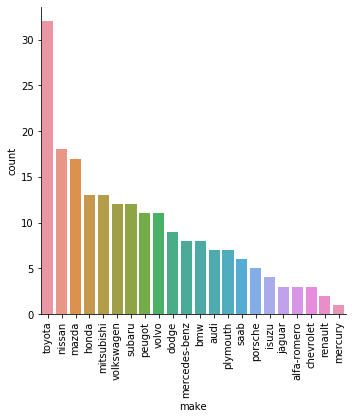

In [27]:
plt.figure(figsize=(18,8))
sns.factorplot('make',data=car,kind='count',order=car['make'].value_counts().index)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x1a242c7110>,
 [Text(0.9703616070620636, 0.5180717629247221, 'toyota'),
  Text(0.33991869870988073, 1.0461621663333946, 'nissan'),
  Text(-0.24242463014482998, 1.0729540058637848, 'mazda'),
  Text(-0.6933435865782372, 0.8539758023216036, 'honda'),
  Text(-0.9703616070620634, 0.5180717629247223, 'mitsubishi'),
  Text(-1.0936768381227688, 0.11777509819050518, 'volkswagen'),
  Text(-1.0628811262387285, -0.2833438043887533, 'subaru'),
  Text(-0.8997222964820984, -0.6328505267541296, 'peugot'),
  Text(-0.6397259257784944, -0.8948467689425093, 'volvo'),
  Text(-0.3399186864662843, -1.0461621703115804, 'dodge'),
  Text(-0.05897235177926904, -1.0984180723775543, 'mercedes-benz'),
  Text(0.20943022501311442, -1.0798791510400396, 'bmw'),
  Text(0.44997550862448626, -1.0037539746562079, 'audi'),
  Text(0.6533636740946794, -0.8849383647314099, 'plymouth'),
  Text(0.8155766972774872, -0.7381291559462655, 'saab'),
  Text(0.9278563754169313, -0.5908320798654682, 'porsc

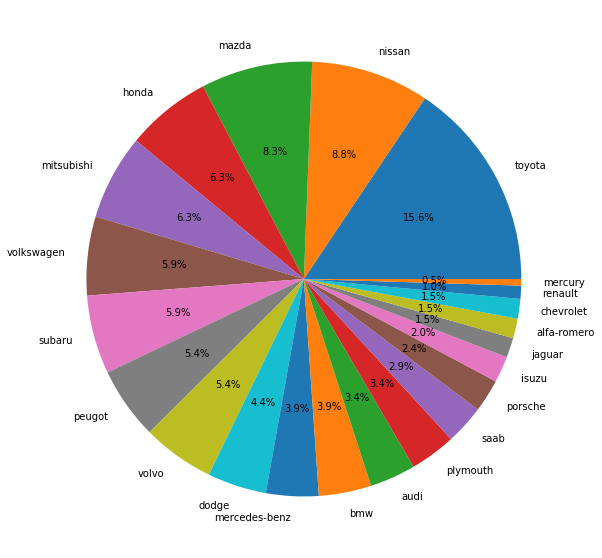

In [28]:
plt.figure(figsize=(20,10))
labels=car['make'].value_counts().index
plt.pie(car['make'].value_counts(),autopct='%1.1f%%',labels=labels)

In [29]:
sns.set()
pd.crosstab(car.make,car['fuel-type'],margins=True).T.style.background_gradient(cmap='viridis')

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,All
fuel-type,,,,,,,,,,,,,,,,,,,,,,,
diesel,0,0,0,0,0,0,0,0,2,4,0,0,1,5,0,0,0,0,0,3,4,1,20
gas,3,7,8,3,9,13,4,3,15,4,1,13,17,6,7,5,2,6,12,29,8,10,185
All,3,7,8,3,9,13,4,3,17,8,1,13,18,11,7,5,2,6,12,32,12,11,205


In [30]:
car['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

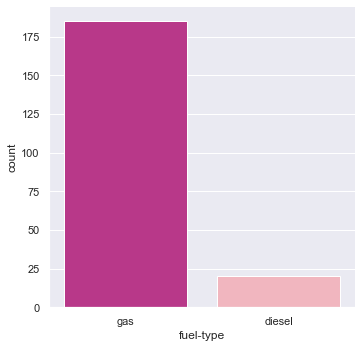

In [31]:
sns.factorplot('fuel-type',data=car,kind='count',palette='RdPu_r')

([<matplotlib.patches.Wedge at 0x1065b1190>,
 [Text(-1.048736003975903, 0.3318927446701041, 'gas'),
  Text(1.2394152407021948, -0.3922369961070999, 'diesel')],
 [Text(-0.5720378203504926, 0.18103240618369312, '90.2%'),
  Text(0.7627170712013505, -0.24137661298898455, '9.8%')])

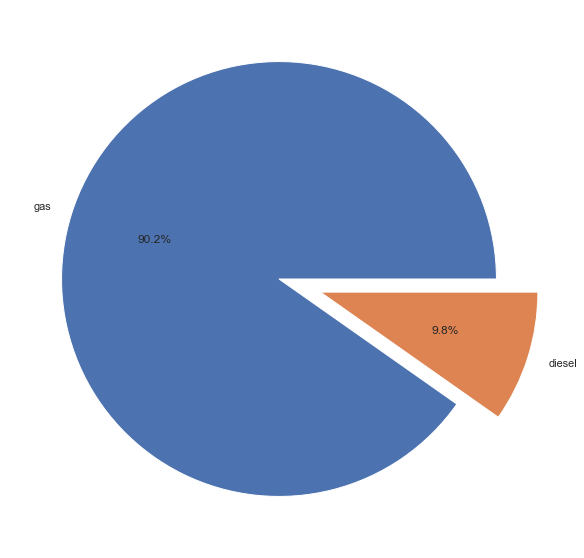

In [32]:
plt.figure(figsize=(20,10))
labels=car['fuel-type'].value_counts().index
plt.pie(car['fuel-type'].value_counts(),autopct='%1.1f%%',explode=[0,0.2],labels=labels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24b114d0>,
      dtype=object)

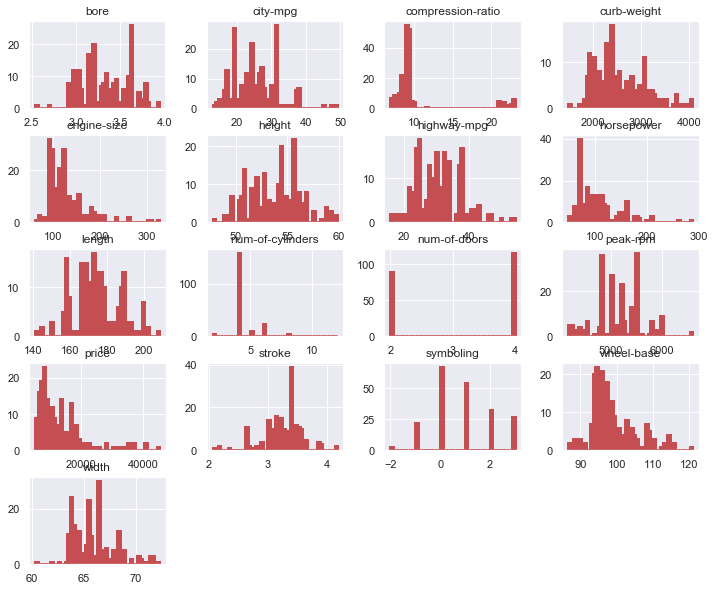

In [33]:

car.hist(bins=50,figsize=(12,10),linewidth='3',edgecolor='r',color='r')

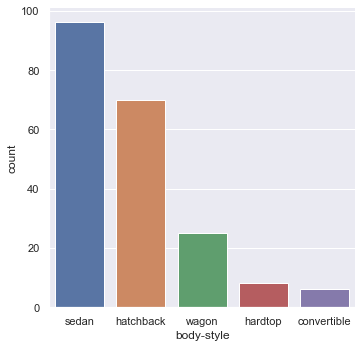

In [34]:

sns.factorplot('body-style',data=car,kind='count',order=car['body-style'].value_counts().index)

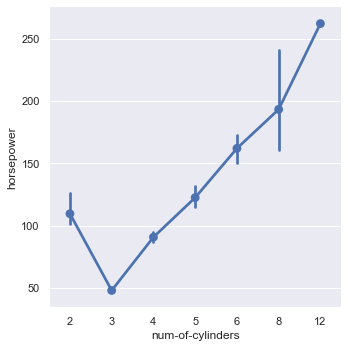

In [35]:
sns.factorplot(y='horsepower',x='num-of-cylinders',data=car)

The ranges of power output for 8 cylinders is quite high compared to the other cylinders. Hence, data for 8 cylinders is a little worrisome.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

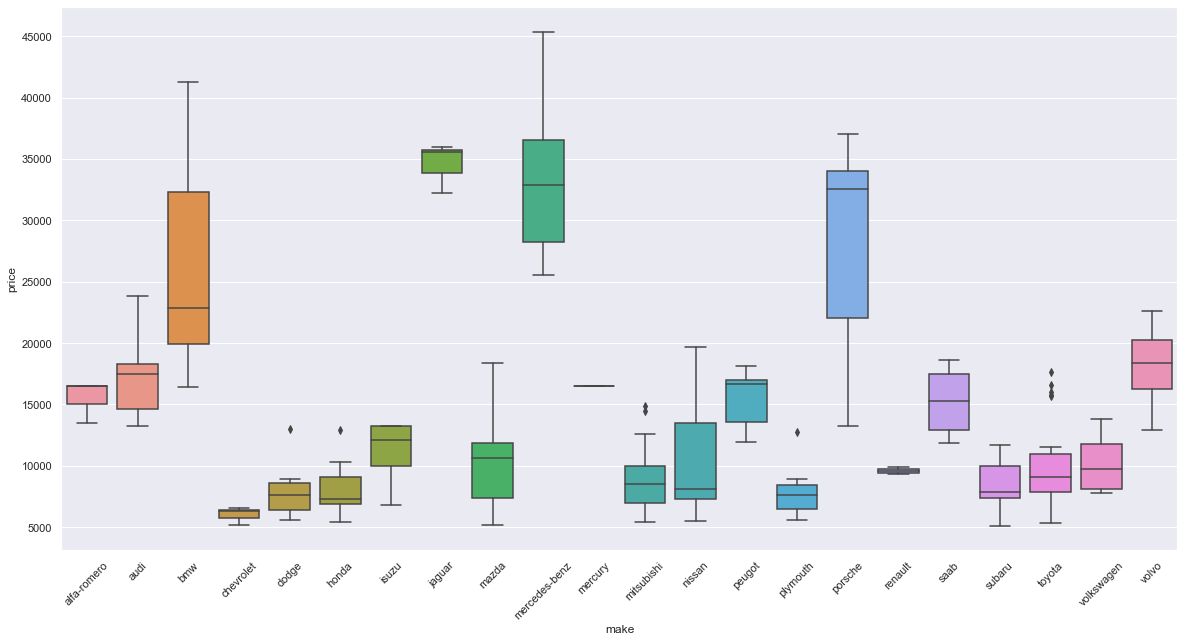

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x='make',y='price',data=car)
plt.xticks(rotation=45)


From the price boxplots, it is seen that Merc,Jaguar,BMW and Porsche sell expensive cars.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



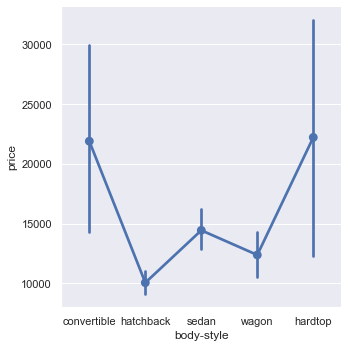

In [37]:

sns.factorplot(y='price',x='body-style',
               data=car,kind='point')

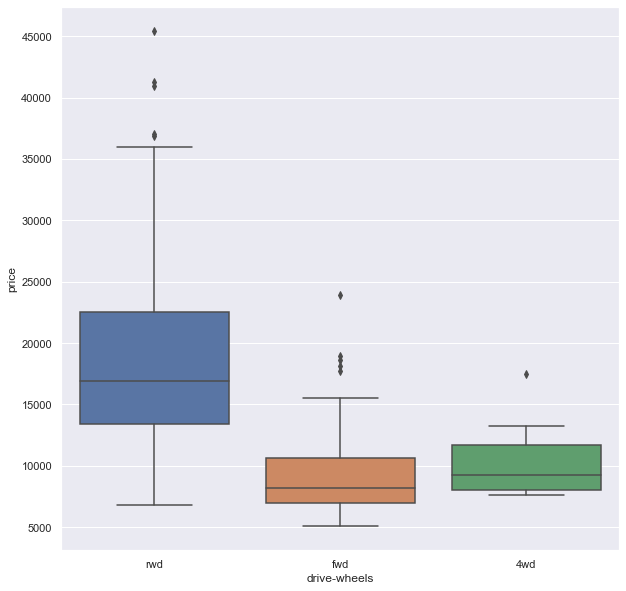

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(x='drive-wheels',y='price',data=car)

The rear wheel drives usually are the sports cars and supercars. Hence, it's median price is higher.


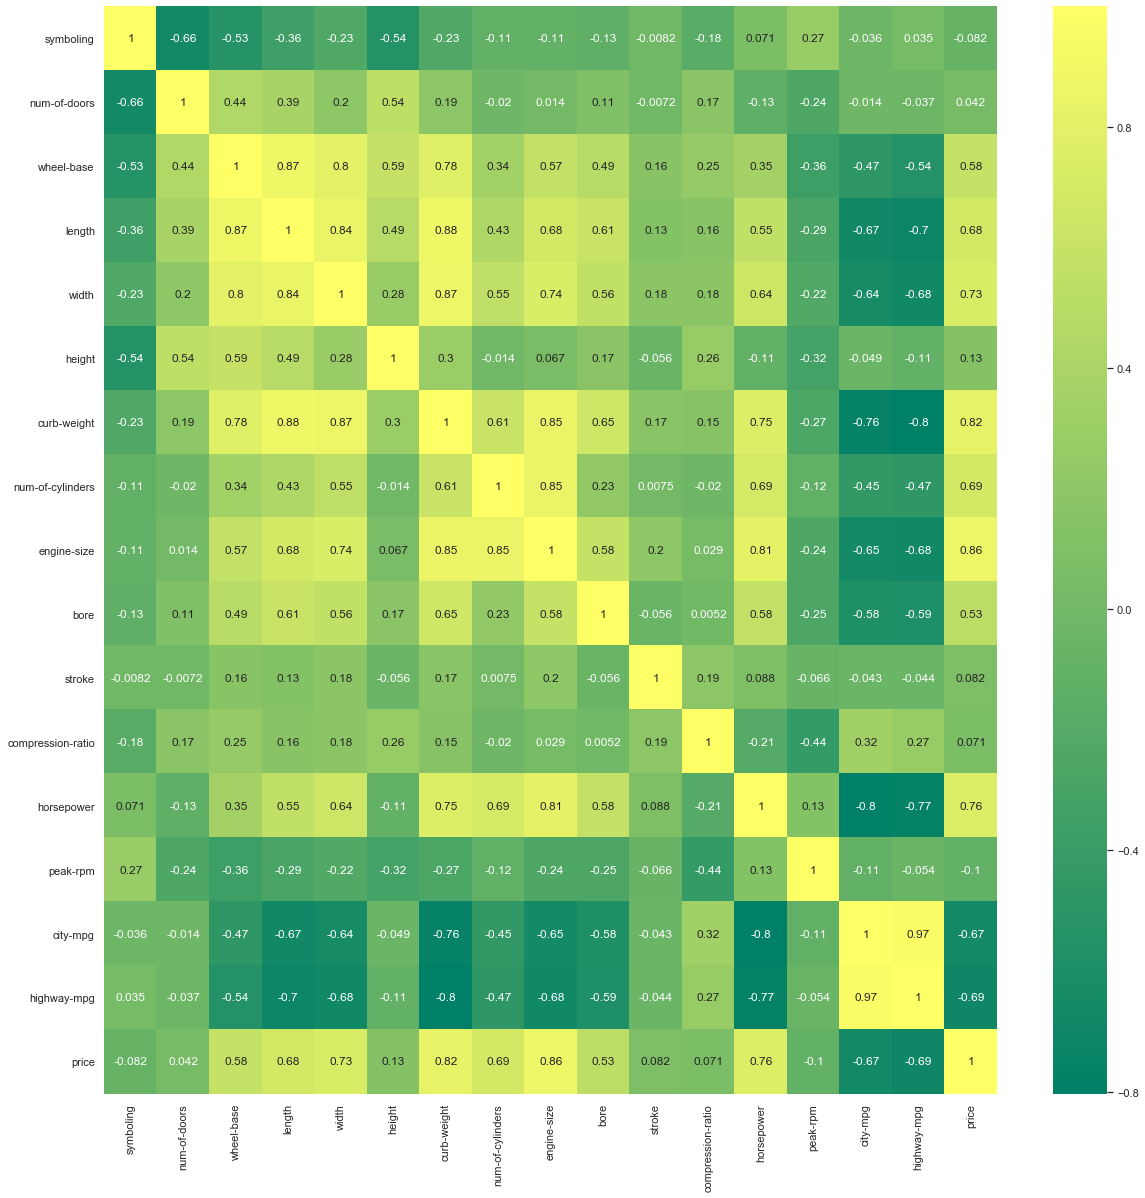

In [69]:
y=car['price']
corr=car.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='summer')

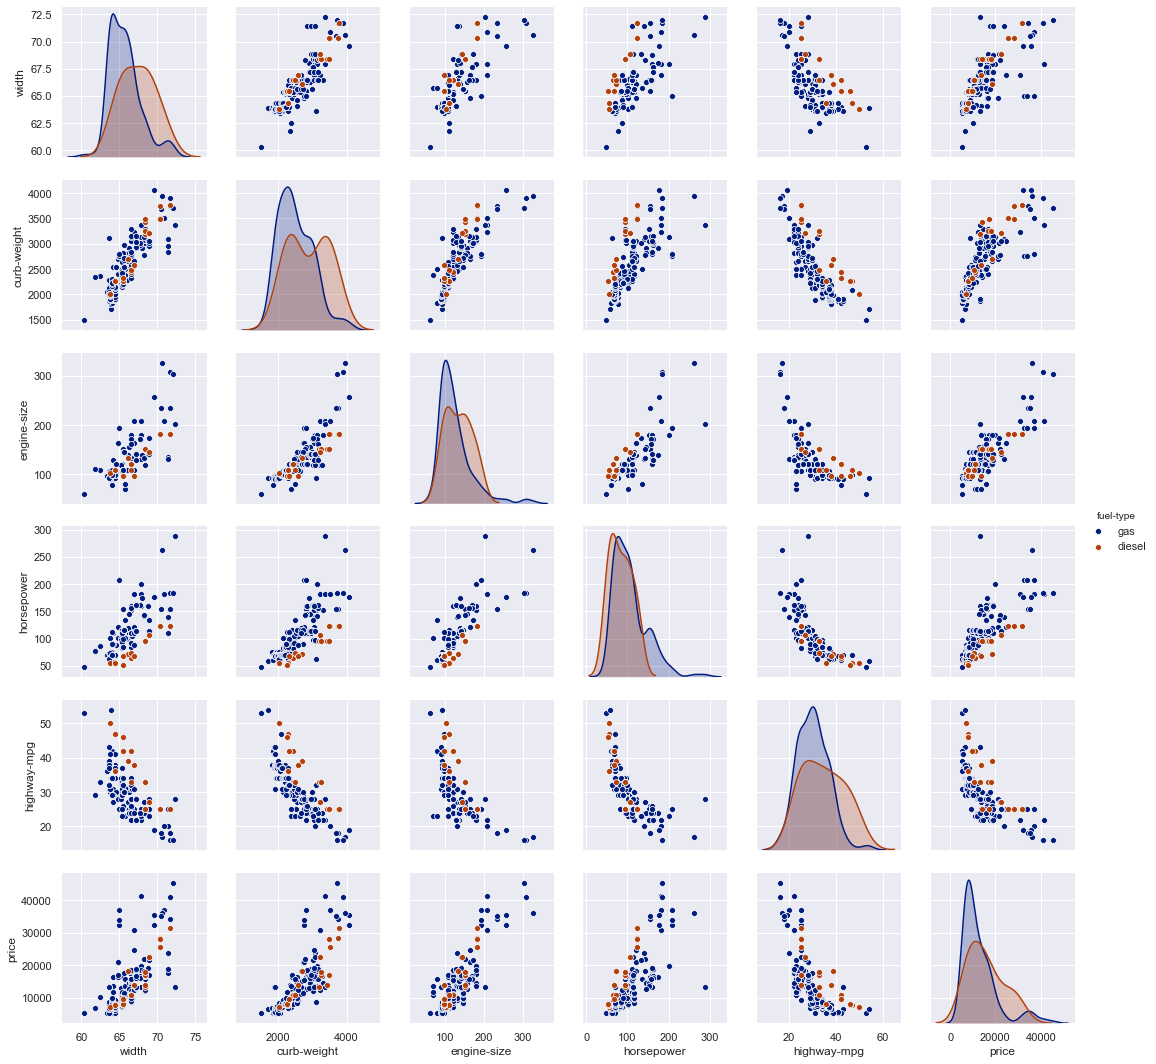

In [45]:
sns.pairplot(car[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price"]],hue='fuel-type',palette='dark')#diag_kind='dist')

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for spliting the data into training and test set
from sklearn import metrics # for validating the accuracy of the model


In [71]:
train,test=train_test_split(car,test_size=0.05,random_state=42)
train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
164,1,168,toyota,gas,std,2,hatchback,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800.0,29,34,8238
65,0,118,mazda,gas,std,4,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000.0,19,27,18280
175,-1,65,toyota,gas,std,4,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200.0,27,32,9988
73,0,?,mercedes-benz,gas,std,4,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500.0,14,16,40960
152,1,74,toyota,gas,std,4,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800.0,31,38,6488


In [72]:
X_train=train[['curb-weight','engine-size','horsepower','width']]
y_train=train['price']

In [84]:
X_test=test[['curb-weight','engine-size','horsepower','width']]
y_test=test['price']


In [74]:
y_test

15     30760
9      13207
100     9549
132    11850
68     28248
95      7799
159     7788
162     9258
147    10198
182     7775
191    13295
Name: price, dtype: int64

In [76]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
predictions=np.round(reg.predict(X_test),2)

In [91]:
df=pd.DataFrame(y_test)

In [94]:
df['Predicted price']=predictions
df=df.rename(columns={'price':'Actual price'})

In [142]:
df['% difference']=abs(df['Actual price']-df['Predicted price'])*100/(df['Actual price'])

In [143]:
df['difference']=df['Actual price']-df['Predicted price']

In [144]:
df

,Actual price,Predicted price,difference,% difference
15,30760,25488.51,5271.49,17.137484
9,13207,17323.81,-4116.81,31.171424
100,9549,11311.73,-1762.73,18.459839
132,11850,13323.71,-1473.71,12.436371
68,28248,24258.57,3989.43,14.122876
95,7799,7066.31,732.69,9.394666
159,7788,8935.68,-1147.68,14.736518
162,9258,7743.34,1514.66,16.360553
147,10198,10663.92,-465.92,4.568739
182,7775,7918.09,-143.09,1.840386


Now, utilising the logistic regression to do the same.

In [124]:
regL=LogisticRegression()
regL.fit(X_train,y_train)
predictions2=regL.predict(X_test)

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [125]:
predictions2

array([13499, 18150,  8845, 16500, 31600,  7609, 10795,  7609,  9279,
        7995, 16500])

In [135]:
df2=pd.DataFrame(y_test)

In [136]:
df2['Predicted price']=predictions2

In [138]:
df2=df2.rename(columns={'price':'Actual price'})

In [139]:
df2

,Actual price,Predicted price
15,30760,13499
9,13207,18150
100,9549,8845
132,11850,16500
68,28248,31600
95,7799,7609
159,7788,10795
162,9258,7609
147,10198,9279
182,7775,7995


In [145]:
df2['% difference']=abs(df2['Actual price']-df2['Predicted price'])*100/(df2['Actual price'])

In [146]:
df2

,Actual price,Predicted price,% difference
15,30760,13499,56.115085
9,13207,18150,37.427122
100,9549,8845,7.372500
132,11850,16500,39.240506
68,28248,31600,11.866327
95,7799,7609,2.436210
159,7788,10795,38.610683
162,9258,7609,17.811622
147,10198,9279,9.011571
182,7775,7995,2.829582
